1.       Try to reproduce the results in Suzuki’s paper
**a.       Load dataset into a dataframe.**

> Use “WGS_Catalyst_Data_4316_Mpct_Descriptors.csv” file

**b.       Try to implement some of the algorithms in the paper, compare with published results**

> i. May need to refer to other paper: “Knowledge extraction for water gas shift reaction over noble metal                 catalysts from publications in the literature between 2002 and 2012.pdf”

> ii. Look at the algorithms: SVM, XGBoost, Random Forest, etc.

**c.       Can use a python script or jupyter notebook. Push code to repository.**


2. [BONUS] If have time, then can look into the more sophisticated feature engineering techniques. Look at the papers in folder “Feature Engineering with Compressed Sensing”

In [2]:
import pandas as pd
import numpy as np
import scipy
import sklearn 
import xgboost
import statistics

import math
import random 
import re
import itertools

from collections import Counter 

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import binom_test
from scipy.stats import norm

from functools import partial

from sklearn import svm

from sklearn.feature_selection import RFECV

from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import shuffle
from sklearn.preprocessing import PolynomialFeatures as plf
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict 
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.kernel_ridge import KernelRidge
from sklearn.gaussian_process.kernels import WhiteKernel, ExpSineSquared

from sklearn.svm import SVR
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn import linear_model
from xgboost import XGBRegressor

from math import sqrt

## Load Dataset

In [3]:
data = pd.read_csv('./project_data/WGS_Catalyst_Data_4316_Mpct_Descriptors.csv')
print(data.shape)

(4295, 102)


In [4]:
data=data.drop(['Total # of Data'], axis=1)
print(data.shape)
data

(4295, 101)


,Pt,Au,Ru,Rh,Ir,Cu,Pd,IWI,WI,CI,...,Promo_EN_Allen,Promo_Atomic_Num,Promo_T_melt,Promo_VE_Villars,Promo_Atomic_Wt,Promo_Group,Promo_Period,Promo_Density,Promo_T_boiling,CO_Conversion
0,0.0,0.874927,0.000000,0.0,0.0,0.0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.60
1,0.0,2.631431,0.000000,0.0,0.0,0.0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.10
2,0.0,4.396856,0.000000,0.0,0.0,0.0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.00
3,0.0,0.874927,0.000000,0.0,0.0,0.0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.20
4,0.0,2.631431,0.000000,0.0,0.0,0.0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.30
5,0.0,4.396856,0.000000,0.0,0.0,0.0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.10
6,0.0,0.874927,0.000000,0.0,0.0,0.0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.60
7,0.0,2.631431,0.000000,0.0,0.0,0.0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.40
8,0.0,4.396856,0.000000,0.0,0.0,0.0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.50
9,0.0,0.874927,0.000000,0.0,0.0,0.0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58.90


## Pre-Processing

In [8]:
scaler = StandardScaler()
X=scaler.fit_transform(X)
X

array([[-0.53715979,  0.30288475, -0.0981937 , ..., -0.77796959,
        -0.67619778, -0.73143586],
       [-0.53715979,  1.62166146, -0.0981937 , ..., -0.77796959,
        -0.67619778, -0.73143586],
       [-0.53715979,  2.94713638, -0.0981937 , ..., -0.77796959,
        -0.67619778, -0.73143586],
       ...,
       [-0.53715979, -0.35400763,  3.25413083, ..., -0.77796959,
        -0.67619778, -0.73143586],
       [-0.53715979, -0.35400763,  3.25413083, ..., -0.77796959,
        -0.67619778, -0.73143586],
       [-0.53715979, -0.35400763,  3.25413083, ..., -0.77796959,
        -0.67619778, -0.73143586]])

In [ ]:
##Distribution plot
sns.set_style('darkgrid')
sns.set_color_codes(palette='dark')

f, ax = plt.subplots(figsize=(10, 10))

sns.distplot(data['CO_Conversion'], color="m", axlabel='CO Conversion')
ax.set(title="Histogram for CO_Conversion")
plt.show()

In [ ]:
## Heatmap
k = 10
corr_mat = data.corr()

cols = corr_mat.nlargest(k, 'CO_Conversion')['CO_Conversion'].index
cm = np.corrcoef(data[cols].values.T)

cmap_ch = sns.cubehelix_palette(as_cmap=True, light=.95)
fig, ax = plt.subplots(figsize=(10,10)) 
hm = sns.heatmap(cm,
                 cmap = cmap_ch,
                 cbar = True, 
                 annot = True, # correlation coeff
                 square = True, 
                 robust = True,
                 cbar_kws={'fraction' : 0.01}, # shrink colour bar
                 annot_kws={'size': 8}, # setting label size
                 yticklabels=cols.values, # set y labels
                 xticklabels=cols.values,
                 linewidth=1,) # Set xlabels
plt.show()

In [6]:
#Split data into features and target
X = data.drop(['CO_Conversion'], axis=1)
y = data.CO_Conversion
print(X.shape)
y

(4295, 100)


0         7.60
1        11.10
2        18.00
3        13.20
4        26.30
5        32.10
6        25.60
7        49.40
8        53.50
9        58.90
10       69.10
11       76.40
12       81.00
13       87.50
14       89.70
15       90.00
16       93.20
17       94.90
18       92.00
19       93.30
20       95.80
21       93.10
22       93.30
23       95.80
24       57.70
25       40.20
26       30.10
27       74.60
28       64.60
29       54.70
         ...  
4265    100.00
4266    100.00
4267    100.00
4268    100.00
4269    100.00
4270    100.00
4271      1.76
4272      1.17
4273      3.13
4274      9.00
4275     14.10
4276     18.80
4277     24.90
4278     30.50
4279     36.40
4280     46.20
4281     56.80
4282     62.80
4283     69.70
4284     76.30
4285     83.60
4286     89.80
4287     94.70
4288     96.30
4289     95.70
4290     94.10
4291     92.40
4292     90.80
4293     87.30
4294     84.30
Name: CO_Conversion, Length: 4295, dtype: float64

In [7]:
#Split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3006, 100)
(1289, 100)
(3006,)
(1289,)


###PCA 

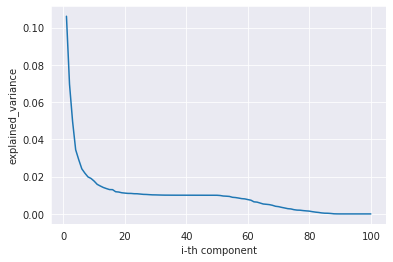

In [86]:
pca = PCA()
pca.fit_transform(X)
pca.get_covariance()
explained_variance=pca.explained_variance_ratio_
plt.plot(np.array(range(len(explained_variance))) + 1,explained_variance)
plt.xlabel('i-th component')
plt.ylabel('explained_variance')
plt.show()


Text(0, 0.5, 'Cumulative explained variance')

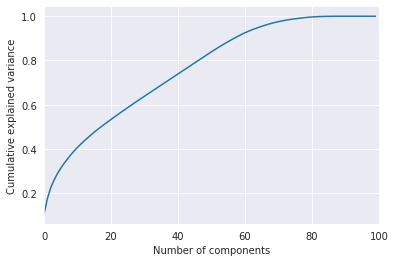

In [89]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,100,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [96]:
pca=PCA(n_components=80)
X2=pca.fit_transform(X)
X2

array([[-3.37633129, -4.19646007,  0.60388809, ..., -0.43009051,
        -0.10105822,  0.01013673],
       [-3.47589303, -4.53881144,  0.74270992, ..., -0.05634831,
        -0.02946902,  0.03696978],
       [-3.57596045, -4.88290165,  0.88223684, ...,  0.31929217,
         0.04248378,  0.06393911],
       ...,
       [-1.09236709,  7.93186866,  1.51896355, ...,  0.07221339,
         0.40421249, -0.00828615],
       [-1.07496419,  7.9381226 ,  1.5092836 , ...,  0.0623346 ,
         0.40344828, -0.01225406],
       [-1.05914337,  7.94380801,  1.50048364, ...,  0.05335388,
         0.40275356, -0.01586124]])

In [4]:
#Split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

NameError: name 'X' is not defined

## Algorithms

### LASSO

In [9]:

lasso_params = {'fit__alpha':[1e-8, 1e-6, 1e-5,1e-4]
}
lasso_pipe = Pipeline([
                 ('fit', linear_model.Lasso(normalize = True))]) 
lasso_regressor = GridSearchCV(lasso_pipe,lasso_params,scoring="neg_root_mean_squared_error",cv=5)

lasso_regressor.fit(X_train,y_train)

print("lasso best parameters:"+ str(lasso_regressor.best_params_))
print("lasso best score" + str(lasso_regressor.best_score_))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 598597.9283168401, tolerance: 252.49978601863205
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 581013.9525698809, tolerance: 249.5464769444683
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 610485.3136791267, tolerance: 249.36201912777224
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

lasso best parameters:{'fit__alpha': 0.0001}
lasso best score-23.280959799497356


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65898.95388652105, tolerance: 313.4979707694146
  positive)


NameError: name 'lasso' is not defined

In [10]:
best_params = lasso_regressor.best_params_
lasso = linear_model.Lasso(alpha=best_params['fit__alpha'])
scores = cross_validate(lasso, X_train, y_train, cv=10,scoring='neg_root_mean_squared_error',return_train_score=True)
print("train score" + str(statistics.mean(scores['train_score'])))
print("validation score:" + str(statistics.mean(scores['test_score'])))


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 666913.0057197793, tolerance: 283.22311868342155
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 688392.3498447562, tolerance: 282.7787935632602
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 662909.0707376724, tolerance: 280.91643030579576
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

train score-22.39914241751743
validation score:-23.17569638969008


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 675663.1958676655, tolerance: 281.2978754116164
  positive)


In [9]:
lasso.fit(X_train,y_train)
rmse= sqrt(mse(y_test, lasso.predict(X_test)))
print("test score:" + str(rmse))

test score:23.175437534786028


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 756769.3904974766, tolerance: 313.49797076941456
  positive)


In [99]:
#PCA
lasso_regressor.fit(X2_train,y2_train)
print("lasso best parameters:"+ str(lasso_regressor.best_params_))
print("lasso best score" + str(lasso_regressor.best_score_))
best_params = lasso_regressor.best_params_
lasso = linear_model.Lasso(alpha=best_params['fit__alpha'])
scores = cross_validate(lasso, X2_train, y2_train, cv=10,scoring='neg_root_mean_squared_error',return_train_score=True)
print("train score" + str(statistics.mean(scores['train_score'])))
print("validation score:" + str(statistics.mean(scores['test_score'])))
lasso.fit(X_train,y_train)
rmse= sqrt(mse(y_test, lasso.predict(X_test)))
print("test score:" + str(rmse))

lasso best parameters:{'fit__alpha': 0.0001}
lasso best score-23.51478663084601
train score-22.70277155343242
validation score:-23.429495068080197
test score:23.17512386871572


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 736838.1482317887, tolerance: 313.49797076941456
  positive)


In [110]:
#RFE
clf_featr_sele = linear_model.Lasso(normalize = True)

rfecv = RFECV(estimator=clf_featr_sele, step=1,scoring="neg_root_mean_squared_error",cv=5)

lasso_pipe = Pipeline([
                 ('fit', linear_model.Lasso(normalize = True))]) 
lasso_regressor = GridSearchCV(lasso_pipe,lasso_params,scoring="neg_root_mean_squared_error",cv=5)


pipeline  = Pipeline([('feature_sele',rfecv),('clf_cv',lasso_regressor)])
pipeline.fit(X_train, y_train)
rmse= sqrt(mse(y_test, pipeline.predict(X_test)))
print("test score:" + str(rmse))

test score:32.84734762246127


### Ridge

In [10]:
ridge_params = {'fit__alpha':[0.001,0.0015,0.01,0.05,0.1,0.5,1]
}
ridge_pipe= Pipeline([('poly', PolynomialFeatures()),
                 ('fit', linear_model.Ridge(normalize = True))])

ridge_regressor = GridSearchCV(ridge_pipe,ridge_params,scoring="neg_root_mean_squared_error",cv=10)
ridge_regressor.fit(X_train,y_train)

print("ridge best parameters:"+ str(ridge_regressor.best_params_))
print("ridge best score" + str(ridge_regressor.best_score_))

ridge best parameters:{'fit__alpha': 0.05}
ridge best score-17.939723932583426


In [62]:
best_params = ridge_regressor.best_params_
ridge = linear_model.Ridge(alpha=best_params['fit__alpha'])
scores = cross_validate(ridge, X_train, y_train, cv=10,scoring='neg_root_mean_squared_error',return_train_score=True)
print("train score" + str(statistics.mean(scores['train_score'])))
print("validation score:" + str(statistics.mean(scores['test_score'])))


train score-22.382747433035856
validation score:-23.165863312065245


In [12]:
ridge.fit(X_train,y_train)
rmse= sqrt(mse(y_test, ridge.predict(X_test)))
print("test score:" + str(rmse))

test score:23.147797707664022


In [100]:
ridge_regressor.fit(X2_train,y2_train)

print("ridge best parameters:"+ str(ridge_regressor.best_params_))
print("ridge best score" + str(ridge_regressor.best_score_))
best_params = ridge_regressor.best_params_
ridge = linear_model.Ridge(alpha=best_params['fit__alpha'])
scores = cross_validate(ridge, X2_train, y2_train, cv=10,scoring='neg_root_mean_squared_error',return_train_score=True)
print("train score" + str(statistics.mean(scores['train_score'])))
print("validation score:" + str(statistics.mean(scores['test_score'])))
ridge.fit(X2_train,y2_train)
rmse= sqrt(mse(y2_test, ridge.predict(X2_test)))
print("test score:" + str(rmse))

ridge best parameters:{'fit__alpha': 0.1}
ridge best score-18.82699722078926
train score-22.702771606712155
validation score:-23.4294921620052
test score:23.397125251883022


### KRR

In [15]:
krr_params = {'fit__alpha':[1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10,100],
              
              'fit__gamma':[1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10,100],
              }
krr_pipe= Pipeline([('fit', KernelRidge(kernel='rbf'))])
krr_regressor = GridSearchCV(krr_pipe,krr_params,scoring="neg_root_mean_squared_error",cv=10)
krr_regressor.fit(X_train,y_train)
print(krr_regressor.best_params_)
print(krr_regressor.best_score_)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular 

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular 

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=5.20972e-17): result may not be accurate.
  overwrite_a=False)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=5.71527e-17): result may not be accurate.
  overwrite_a=False)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-pac

{'fit__alpha': 0.01, 'fit__gamma': 1e-05}
-15.583061485987624


In [61]:
best_params = krr_regressor.best_params_
krr = KernelRidge(kernel='rbf',alpha=best_params['fit__alpha'],gamma = best_params['fit__gamma'])
scores = cross_validate(krr, X_train, y_train, cv=10,scoring='neg_root_mean_squared_error',return_train_score=True)
print("train score" + str(statistics.mean(scores['train_score'])))
print("validation score:" + str(statistics.mean(scores['test_score'])))



train score-12.084571441648182
validation score:-15.583061485987622


In [17]:
krr.fit(X_train,y_train)
rmse= sqrt(mse(y_test, krr.predict(X_test)))
print("test score:" + str(rmse))

test score:14.858413713406915


In [101]:
#PCA
krr_regressor.fit(X2_train,y2_train)
print(krr_regressor.best_params_)
print(krr_regressor.best_score_)
best_params = krr_regressor.best_params_
krr = KernelRidge(kernel='rbf',alpha=best_params['fit__alpha'],gamma = best_params['fit__gamma'])
scores = cross_validate(krr, X2_train, y2_train, cv=10,scoring='neg_root_mean_squared_error',return_train_score=True)
print("train score" + str(statistics.mean(scores['train_score'])))
print("validation score:" + str(statistics.mean(scores['test_score'])))
krr.fit(X2_train,y2_train)
rmse= sqrt(mse(y2_test, krr.predict(X2_test)))
print("test score:" + str(rmse))

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular 

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular 

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular 

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular 

{'fit__alpha': 0.001, 'fit__gamma': 0.01}
-12.784905864614114
train score-9.136656580809301
validation score:-12.784905864614116
test score:11.923829355588593


### SVR

In [ ]:
### Build model
svr_params={
            'C': [0.1, 1, 100, 1000],
            'epsilon': [0.0001,0.001,0.01, 0.1, 1, 10],
            'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]
        }
svr_regressor = GridSearchCV(SVR(kernel='rbf'),svr_params,scoring="neg_root_mean_squared_error",cv=10)
svr_regressor.fit(X_train,y_train)
print("SVR best parameters:"+ str(svr_regressor.best_params_))
print("SVR best score" + str(svr_regressor.best_score_))


KRR best parameters:{'C': 1000, 'epsilon': 1, 'gamma': 0.0001}
KRR best score-14.131693865652817


In [53]:
best_params = svr_regressor.best_params_
svr = SVR(C=best_params["C"], epsilon=best_params["epsilon"], gamma=best_params["gamma"])
scores = cross_validate(svr, X_train, y_train, cv=10,scoring='neg_root_mean_squared_error',return_train_score=True)
print("train score" + str(statistics.mean(scores['train_score'])))
print("validation score:" + str(statistics.mean(scores['test_score'])))


train score-8.764458588339803
validation score:-14.131693865652817


In [54]:
svr.fit(X_train,y_train)
rmse= sqrt(mse(y_test, svr.predict(X_test)))
print("test score:" + str(rmse))

test score:13.365160616478182


In [117]:
#PCA
svr_regressor.fit(X2_train,y2_train)
print("SVR best parameters:"+ str(svr_regressor.best_params_))
print("SVR best score" + str(svr_regressor.best_score_))
best_params = svr_regressor.best_params_
svr = SVR(C=best_params["C"], epsilon=best_params["epsilon"], gamma=best_params["gamma"])
scores = cross_validate(svr, X2_train, y2_train, cv=10,scoring='neg_root_mean_squared_error',return_train_score=True)
print("train score" + str(statistics.mean(scores['train_score'])))
print("validation score:" + str(statistics.mean(scores['test_score'])))
svr.fit(X2_train,y2_train)
rmse= sqrt(mse(y2_test, svr.predict(X2_test)))
print("test score:" + str(rmse))

SVR best parameters:{'C': 100, 'epsilon': 0.0001, 'gamma': 1}
SVR best score-11.556714655864395
train score-5.278289105593005
validation score:-11.556714655864395
test score:11.24985386832459


### RFR

In [44]:
### Build model
rfr_params={
            'max_depth': [10,20,30,40,50,100],
            'max_leaf_nodes':[600,800,1000,1200,1500],
            'n_estimators' :[10,30,40,50,60,80,100,150,200],
        }

rfr_regressor = GridSearchCV(
        RandomForestRegressor(criterion="mse",max_features="log2"),
        rfr_params,
        cv=10, scoring="neg_root_mean_squared_error", verbose=0, n_jobs=-1)
rfr_regressor.fit(X_train,y_train)
best_params = rfr_regressor.best_params_
print(best_params)

{'max_depth': 100, 'max_leaf_nodes': 1500, 'n_estimators': 200}


In [45]:
best_params = rfr_regressor.best_params_
rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"])
scores = cross_validate(rfr, X_train, y_train, cv=10,scoring='neg_root_mean_squared_error',return_train_score=True)
print("train score" + str(statistics.mean(scores['train_score'])))
print("validation score:" + str(statistics.mean(scores['test_score'])))

train score-5.106095105498743
validation score:-12.531301389851116


In [68]:
rfr.fit(X_train,y_train)
rmse= sqrt(mse(y_test, rfr.predict(X_test)))
print("test score:" + str(rmse))

test score:11.941898183692432


In [118]:
rfr_regressor.fit(X2_train,y2_train)
best_params = rfr_regressor.best_params_
print(best_params)
best_params = rfr_regressor.best_params_
rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"])
scores = cross_validate(rfr, X2_train, y2_train, cv=10,scoring='neg_root_mean_squared_error',return_train_score=True)
print("train score" + str(statistics.mean(scores['train_score'])))
print("validation score:" + str(statistics.mean(scores['test_score'])))
rfr.fit(X2_train,y2_train)
rmse= sqrt(mse(y2_test, rfr.predict(X2_test)))
print("test score:" + str(rmse))

{'max_depth': 30, 'max_leaf_nodes': 1500, 'n_estimators': 200}
train score-5.497762362403451
validation score:-13.653597520933332
test score:12.301780779511413


### ETR

In [66]:
### Build model
etr_params={
            'max_depth': [10,20,30,40,50,100],
            'max_leaf_nodes':[600,800,1000,1200,1500],
            'n_estimators' :[10,30,40,50,60,80,100,150,200],
        }

etr_regressor = GridSearchCV(
       ExtraTreesRegressor(criterion="mse",max_features="log2"),
        etr_params,
        cv=10, scoring="neg_root_mean_squared_error", verbose=0, n_jobs=-1)
etr_regressor.fit(X_train,y_train)
best_params = etr_regressor.best_params_
print(best_params)

{'max_depth': 50, 'max_leaf_nodes': 1500, 'n_estimators': 150}


In [67]:
etr = ExtraTreesRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"])
scores = cross_validate(etr, X_train, y_train, cv=10,scoring='neg_root_mean_squared_error',return_train_score=True)
print("train score" + str(statistics.mean(scores['train_score'])))
print("validation score:" + str(statistics.mean(scores['test_score'])))

train score-2.5846190138088274
validation score:-11.699920327246446


In [57]:
etr.fit(X_train,y_train)
rmse= sqrt(mse(y_test, etr.predict(X_test)))
print("test score:" + str(rmse))

test score:11.348520889949755


In [116]:
etr_regressor.fit(X2_train,y2_train)
best_params = etr_regressor.best_params_
print(best_params)
etr = ExtraTreesRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"])
scores = cross_validate(etr, X2_train, y2_train, cv=10,scoring='neg_root_mean_squared_error',return_train_score=True)
print("train score" + str(statistics.mean(scores['train_score'])))
print("validation score:" + str(statistics.mean(scores['test_score'])))
etr.fit(X2_train,y2_train)
rmse= sqrt(mse(y2_test, etr.predict(X2_test)))
print("test score:" + str(rmse))

{'max_depth': 40, 'max_leaf_nodes': 1500, 'n_estimators': 80}
train score-2.5846141925137394
validation score:-11.992921293373803
test score:11.001443069027072


### XGB

In [ ]:
### Build model
xgb_params={
            'max_depth': [4,5,6,7,8],
            'subsample': [0.8,0.9,1],
            'colsample':[0.8,0.9,1],
            'learningrate':[0.05],
            'n_estimators' :[200,500,800],
            
        }

xgb_regressor = GridSearchCV(
       XGBRegressor(),
        xgb_params,
        cv=3, scoring="neg_root_mean_squared_error", verbose=0, n_jobs=-1)
xgb_regressor.fit(X_train,y_train)
best_params = xgb_regressor.best_params_
print(best_params)

[17:43:25] WARNING: /workspace/src/learner.cc:480: 
Parameters: { colsample, learningrate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


{'colsample': 0.8, 'learningrate': 0.05, 'max_depth': 4, 'n_estimators': 800, 'subsample': 1}


In [ ]:
best_params = xgb_regressor.best_params_
xgb = XGBRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],
                          subsample=best_params["subsample"], colsample=best_params["colsample"],
                         learningrate=best_params["learningrate"])
scores = cross_validate(xgb, X_train, y_train, cv=10,scoring='neg_root_mean_squared_error',return_train_score=True)
print("train score" + str(statistics.mean(scores['train_score'])))
print("validation score:" + str(statistics.mean(scores['test_score'])))

[17:43:28] WARNING: /workspace/src/learner.cc:480: 
Parameters: { colsample, learningrate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:43:31] WARNING: /workspace/src/learner.cc:480: 
Parameters: { colsample, learningrate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:43:34] WARNING: /workspace/src/learner.cc:480: 
Parameters: { colsample, learningrate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verificat

In [ ]:
xgb.fit(X_train,y_train)
rmse= sqrt(mse(y_test, xgb.predict(X_test)))
print("test score:" + str(rmse))

[17:44:00] WARNING: /workspace/src/learner.cc:480: 
Parameters: { colsample, learningrate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


test score:10.254481960762751


In [122]:
#PCA
xgb_regressor.fit(X2_train,y2_train)
best_params = xgb_regressor.best_params_
print(best_params)
best_params = xgb_regressor.best_params_
xgb = XGBRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],
                          subsample=best_params["subsample"], colsample=best_params["colsample"],
                         learningrate=best_params["learningrate"])
scores = cross_validate(xgb, X2_train, y2_train, cv=10,scoring='neg_root_mean_squared_error',return_train_score=True)
print("train score" + str(statistics.mean(scores['train_score'])))
print("validation score:" + str(statistics.mean(scores['test_score'])))
xgb.fit(X2_train,y2_train)
rmse= sqrt(mse(y2_test, xgb.predict(X2_test)))
print("test score:" + str(rmse))

[11:51:37] WARNING: /workspace/src/learner.cc:480: 
Parameters: { colsample, learningrate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


{'colsample': 0.8, 'learningrate': 0.05, 'max_depth': 4, 'n_estimators': 500, 'subsample': 1}
[11:51:43] WARNING: /workspace/src/learner.cc:480: 
Parameters: { colsample, learningrate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:51:49] WARNING: /workspace/src/learner.cc:480: 
Parameters: { colsample, learningrate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  p

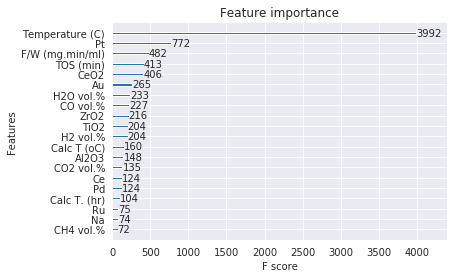

In [50]:
## XGBoost Feature importance
from xgboost import plot_importance
plot_importance(xgb, max_num_features=20) # top 20 most important features
plt.show()


### Voting Regression

In [73]:
from sklearn.ensemble import VotingRegressor
voting_reg = VotingRegressor(
    estimators=[('lasso',lasso),('ridge',ridge),('krr', krr),('svr',svr), ('rfr',rfr),('etr',rfr),('xgb', xgb)])
scores = cross_validate(voting_reg, X_train, y_train, cv=10,scoring='neg_root_mean_squared_error',return_train_score=True)
print("train score" + str(statistics.mean(scores['train_score'])))
print("validation score:" + str(statistics.mean(scores['test_score'])))
rmse= sqrt(mse(y_test, voting_reg.predict(X_test)))
print("test score:" + str(rmse))

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 666758.280161702, tolerance: 283.22311868342143
  positive)


[18:44:17] WARNING: /workspace/src/learner.cc:480: 
Parameters: { colsample, learningrate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 688239.9318200274, tolerance: 282.77879356326014
  positive)


[18:44:40] WARNING: /workspace/src/learner.cc:480: 
Parameters: { colsample, learningrate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 662734.9495226439, tolerance: 280.91643030579576
  positive)


[18:45:02] WARNING: /workspace/src/learner.cc:480: 
Parameters: { colsample, learningrate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 674876.0148734447, tolerance: 281.9867903623543
  positive)


[18:45:25] WARNING: /workspace/src/learner.cc:480: 
Parameters: { colsample, learningrate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 691352.4973018217, tolerance: 280.3100533675053
  positive)


[18:45:46] WARNING: /workspace/src/learner.cc:480: 
Parameters: { colsample, learningrate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 676410.9456473077, tolerance: 282.25500851243197
  positive)


[18:46:09] WARNING: /workspace/src/learner.cc:480: 
Parameters: { colsample, learningrate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 687675.7462200446, tolerance: 283.97788431827763
  positive)


[18:46:31] WARNING: /workspace/src/learner.cc:480: 
Parameters: { colsample, learningrate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 688254.3397479637, tolerance: 283.3227122371475
  positive)


[18:46:54] WARNING: /workspace/src/learner.cc:480: 
Parameters: { colsample, learningrate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 675259.664109517, tolerance: 281.32803309270656
  positive)


[18:47:17] WARNING: /workspace/src/learner.cc:480: 
Parameters: { colsample, learningrate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 675523.0806616064, tolerance: 281.29787541161636
  positive)


[18:47:39] WARNING: /workspace/src/learner.cc:480: 
Parameters: { colsample, learningrate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


train score-9.371391899889499
validation score:-12.903505522815458


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 756769.3904974766, tolerance: 313.49797076941456
  positive)


[18:48:03] WARNING: /workspace/src/learner.cc:480: 
Parameters: { colsample, learningrate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


test score:12.430050535831718


In [119]:
voting_reg2 = VotingRegressor(
    estimators=[('rfr',rfr),('etr',rfr),('xgb', xgb)])
scores = cross_validate(voting_reg2, X_train, y_train, cv=10,scoring='neg_root_mean_squared_error',return_train_score=True)
print("train score" + str(statistics.mean(scores['train_score'])))
print("validation score:" + str(statistics.mean(scores['test_score'])))
voting_reg2.fit(X_train,y_train)
rmse= sqrt(mse(y_test, voting_reg2.predict(X_test)))
print("test score:" + str(rmse))

[10:46:05] WARNING: /workspace/src/learner.cc:480: 
Parameters: { colsample, learningrate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:46:19] WARNING: /workspace/src/learner.cc:480: 
Parameters: { colsample, learningrate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:46:34] WARNING: /workspace/src/learner.cc:480: 
Parameters: { colsample, learningrate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verificat

In [120]:
voting_reg2 = VotingRegressor(
    estimators=[('rfr',rfr),('etr',rfr),('xgb', xgb)])
scores = cross_validate(voting_reg2, X_train, y_train, cv=10,scoring='neg_root_mean_squared_error',return_train_score=True)
print("train score" + str(statistics.mean(scores['train_score'])))
print("validation score:" + str(statistics.mean(scores['test_score'])))
voting_reg2.fit(X2_train,y2_train)
rmse= sqrt(mse(y2_test, voting_reg2.predict(X2_test)))
print("test score:" + str(rmse))

[10:51:53] WARNING: /workspace/src/learner.cc:480: 
Parameters: { colsample, learningrate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:52:07] WARNING: /workspace/src/learner.cc:480: 
Parameters: { colsample, learningrate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:52:21] WARNING: /workspace/src/learner.cc:480: 
Parameters: { colsample, learningrate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verificat